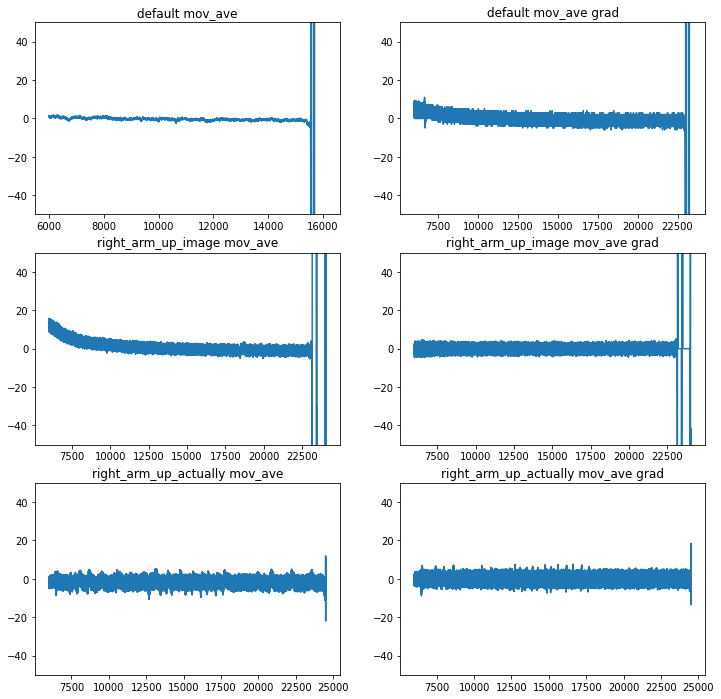

In [145]:
%config IPCompleter.greedy=True

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: unset; }</style>"))
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import pandas as pd

# 一部
X_START = 6000
RANGE_X = 25000
RANGE_Y = 50

# 全体
# X_START = 5000
# RANGE_X = 10000
# RANGE_Y = 500

def plot_graph(file_name, label, order, title):
    data = pd.read_csv(file_name, header=None)[0]
    max_ = min(X_START+RANGE_X, len(data))
    x = list(range(X_START, max_))
    y = data[X_START:max_]
    axis.append(fig.add_subplot(3, 2, order))
    plt.ylim(-RANGE_Y, RANGE_Y)
    axis[-1].set_title(title)
    axis[-1].plot(x, y, label=label)

axis = []
fig = plt.figure(figsize=(12, 12))
order = 0

# cream

# # default_front_moving_averaged
# print("通常時 移動平均")
# plot_graph("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/default_front/default_front_1_moving_averaged.csv", "default_front_1_mov_ave")
# plt.legend()
# plt.show()
# # default_front_moving_averaged_grad
# print("通常時 移動平均 傾き")
# plot_graph("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/default_front/default_front_1_moving_averaged_grad.csv", "default_front_1_mov_ave_grd")
# plt.legend()
# plt.show()

# default_front_moving_averaged
order += 1
plot_graph("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/default_front/default_front_2_moving_averaged.csv", "default_front_mov_ave", order, "default mov_ave")

# default_front_moving_averaged_grad
order += 1
plot_graph("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/default_front/default_front_3.csv", "default_front_mov_ave_grd", order, "default mov_ave grad")

# right_arm_up_image
# 若干上にずれた
# plot_graph("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/right_arm_up_image/right_arm_up_image_1.csv", "right_arm")

# right_arm_up_image_moving_averaged
order += 1
plot_graph("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/right_arm_up_image/right_arm_up_image_1_moving_averaged.csv", "right_arm_up_img_mov_ave", order, "right_arm_up_image mov_ave")

# right_arm_up_image_moving_averaged_grad
order += 1
plot_graph("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/right_arm_up_image/right_arm_up_image_1_moving_averaged_grad.csv", "right_arm_up_img_mov_ave_grd", order, "right_arm_up_image mov_ave grad")

# 実際に腕を上げても差がない
# ±20の範囲が安定している -> cream_defaultのときと同じ

# default_front_y100
# y100(no cream)
# クリームなしでもyが100までいった
# plot_graph("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/near_2_points/default_front/default_front_2_y100.csv", "default_front")

# right_arm_up
# 実際に腕を上げた
# plot_graph("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/right_arm_up/right_arm_up_1.csv", "right_arm actually")

# right_arm_up_moving_averaged
order += 1
plot_graph("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/right_arm_up/right_arm_up_1_moving_averaged.csv", "right_arm_up_mov_ave", order, "right_arm_up_actually mov_ave")

# right_arm_up_moving_averaged_grad
order += 1
plot_graph("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/right_arm_up/right_arm_up_1_moving_averaged_grad.csv", "right_arm_up_mov_ave_grd", order, "right_arm_up_actually mov_ave grad")

plt.show()

移動平均の幅を決める
0.04s(25Hz)～0.06s(17Hz)になるようにする

file: C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/right_arm_up/right_arm_up_1.csv
時間: 95(s)
X軸の目盛り: 24500(目盛り)
95 / 24500 ≒ 0.0039(s/目盛り)

X_START = 1020
RANGE_X = 15
RANGE_Y = 50
のとき、1024 <= X <= 1029の範囲で1周期
0.0039(s/目盛り) * 5(目盛り) ≒ 0.02(s)
1.0 / 0.02(s) = 50(Hz)

-6～+6の範囲で移動平均を取る
0.0039(s/目盛り) * 12(目盛り) ≒ 0.047(s)
1.0 / 0.047 = 21(Hz)

より、WIDTH = 6

In [125]:
# 移動平均を取る

with open("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/default_front/default_front_2.csv", "r") as f:
    r = f.read()

amp = list(map(int, r.split()))
N = len(amp)
WIDTH = 6
amp_ave = amp.copy()
for i in range(N):
    sm = 0
    if i-WIDTH<0 or i+WIDTH>=N:
        continue
    for j in range(-WIDTH, WIDTH+1):
        sm += amp[i+j]
    amp_ave[i] = sm/(2*WIDTH)

n = 20
for i in range(n):
    print("%5d"%(amp[i]), end=" ")
print()
for i in range(n):
    print("%5d"%(amp_ave[i]), end=" ")

amp_ave = map(str, amp_ave)
amp_ave = "\n".join(amp_ave)
with open("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/default_front/default_front_2_moving_averaged.csv", "w") as f:
    f.write(amp_ave)

-233500   499   499   499   499   499   499   499   499   499   499   499   499   499   499   499   499   499   499   499 
-233500   499   499   499   499   499 -18959   540   540   540   540   540   540   540   540   540   540   540   540   540 

In [126]:
# 移動平均の傾きを出す

with open("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/default_front/default_front_2_moving_averaged.csv", "r") as f:
    r = f.read()

amp = list(map(float, r.split()))
N = len(amp)

amp_grad = [0]*N
n = 30
for i in range(n, N):
    amp_grad[i] = amp[i]-amp[i-n]

amp_grad = map(str, amp_grad)
amp_grad = "\n".join(amp_grad)

with open("C:/choco/EEG-SMT/BrainBay2.7/bin/REPORTS/cream_near_2_points/default_front/default_front_2_moving_averaged_grad.csv", "w") as f:
    f.write(amp_grad)